In [0]:
!pip install kaggle


In [0]:
!mkdir .kaggle


In [0]:
import json
token = {"username":"mssanjay","key":"63500b560696ce791d6ad3363a760246"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [0]:
!kaggle datasets download -d tentotheminus9/seti-data -p/content


100% 5.23G/5.25G [00:43<00:00, 129MB/s]
100% 5.25G/5.25G [00:44<00:00, 128MB/s]


In [0]:
!unzip \*.zip

Archive:  seti-data.zip
  inflating: primary_small_v3.zip    
  inflating: primary_small.zip       


In [0]:
ls

primary_small_v3.zip  primary_small.zip  sample_data/  seti-data.zip


In [0]:
rm primary_small_v3.zip

In [0]:
ls

primary_small.zip  sample_data/  seti-data.zip


In [0]:
!unzip \*.zip

Archive:  seti-data.zip
  inflating: primary_small_v3.zip    N

replace primary_small.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
Archive:  primary_small.zip
   creating: test/
   creating: test/brightpixel/
  inflating: test/brightpixel/1004_brightpixel.png  
 extracting: test/brightpixel/1056_brightpixel.png  
  inflating: test/brightpixel/1112_brightpixel.png  
  inflating: test/brightpixel/1128_brightpixel.png  
  inflating: test/brightpixel/1219_brightpixel.png  
  inflating: test/brightpixel/1293_brightpixel.png  
  inflating: test/brightpixel/1300_brightpixel.png  
  inflating: test/brightpixel/1301_brightpixel.png  
  inflating: test/brightpixel/1399_brightpixel.png  
 extracting: test/brightpixel/1401_brightpixel.png  
  inflating: test/brightpixel/1411_brightpixel.png  
  inflating: test/brightpixel/1469_brightpixel.png  
 extracting: test/brightpixel/1499_brightpixel.png  
 extracting: test/brightpixel/1535_brightpixel.png  
  inflating: test/brightpixel/1650_brightpixel.png

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
def pp(img,gray=False):
    img = cv2.resize(img, (224, 224))
    if gray:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean = np.mean(img)
    std = np.std(img)
    imag = np.clip(img, mean-3.5*std, mean+3.5*std)
  
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel=np.ones((3, 3), dtype=np.float32))
    x = cv2.Sobel(img, cv2.CV_64F, 1, 0, 2)
    y = cv2.Sobel(img, cv2.CV_64F, 0, 1, 2)
    img = cv2.addWeighted(src1=x, alpha=0.7, src2=y, beta=0.3, gamma=0)
    img = img.reshape(224, 224, 1)
    img = img/255
    return img
  

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(width_shift_range=0.01,
                                 height_shift_range=0.01,
                                 zoom_range=0.01,
                                 shear_range=0.01,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 preprocessing_function=pp,
                                 rotation_range=3.0)

In [0]:
import os
import itertools
import time
train=train_gen.flow_from_directory(directory=os.path.join("train"),target_size=(224,224),batch_size=50,color_mode="grayscale")

Found 5600 images belonging to 7 classes.


In [0]:
p,q=(train.next())

In [0]:
q

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [0]:
x_train = np.empty(shape=(0,224,224,1))
y_train = np.empty(shape=(0,))

In [0]:
for c in ["brightpixel","narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]:
  dir = os.path.join("train", c)
  temx=[]
  temy=[]
  for idx, file in enumerate(os.listdir(dir)):
    im = cv2.imread(os.path.join(dir, file))
    im = pp(im,True)
    temx.insert(idx,im)
    temy.insert(idx,c)
  temx=np.array(temx)
  temy=np.array(temy)
  x_train=np.append(x_train,temx,axis=0)
  y_train=np.append(y_train,temy,axis=0)

In [0]:
x_test = np.empty(shape=(0,224,224,1))
y_test = np.empty(shape=(0,))

In [0]:
for c in ["brightpixel","narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]:
  dir = os.path.join("test", c)
  temx=[]
  temy=[]
  for idx, file in enumerate(os.listdir(dir)):
    im = cv2.imread(os.path.join(dir, file))
    im = pp(im,True)
    temx.insert(idx,im)
    temy.insert(idx,c)
  temx=np.array(temx)
  temy=np.array(temy)
  x_test=np.append(x_test,temx,axis=0)
  y_test=np.append(y_test,temy,axis=0)

In [0]:
x_valid = np.empty(shape=(0,224,224,1))
y_valid = np.empty(shape=(0,))

In [0]:
for c in ["brightpixel","narrowband","narrowbanddrd","noise","squarepulsednarrowband","squiggle","squigglesquarepulsednarrowband"]:
  dir = os.path.join("valid", c)
  temx=[]
  temy=[]
  for idx, file in enumerate(os.listdir(dir)):
    im = cv2.imread(os.path.join(dir, file))
    im = pp(im,True)
    temx.insert(idx,im)
    temy.insert(idx,c)
  temx=np.array(temx)
  temy=np.array(temy)
  x_valid=np.append(x_test,temx,axis=0)
  y_valid=np.append(y_test,temy,axis=0)

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

enc = LabelEncoder()
enc.fit(y_test)
enc = enc.transform(y_test)
y_test = to_categorical(enc,7)
y_test = np.argmax(y_test, axis=1)

In [0]:
enc = LabelEncoder()
enc.fit(y_valid)
enc = enc.transform(y_valid)
y_valid = to_categorical(enc,7)
#y_valid = np.argmax(y_valid, axis=1)

In [0]:
enc = LabelEncoder()
enc.fit(y_train)
enc = enc.transform(y_train)
y_train = to_categorical(enc,7)
#y_train = np.argmax(y_train, axis=1)

In [0]:
train_gen.fit(x_train)

In [0]:
np.shape(x_train)[0]

In [0]:
a=train_gen.flow(x_train,y_train,batch_size=50)

In [0]:
a

In [0]:
b,c=(a.next())

In [0]:
b

In [0]:
np.shape(b)

In [0]:
c

In [0]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.layers import Dense, LeakyReLU, Flatten, Dropout,Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [0]:
from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten

In [0]:
import keras
from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf
from keras.datasets import cifar10

In [0]:
import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

In [0]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [0]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [0]:
input_layer = Input(shape=(224, 224, 1))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(7, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(7, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(7, activation='softmax', name='output')(x)

In [0]:
from keras.models import Model


In [0]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')


In [0]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 3200        input_4[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2a_3x3/1 (Conv2D)          (None, 56, 56, 64)   4160        max_pool_1_3x3/2[0][0]           
__________________________________________________________________________________________________
conv_2b_3x

In [0]:
opt=Adam(lr=0.00146)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

In [0]:
his=model.fit(b,[c,c,c],epochs=10,shuffle=True,verbose=1,validation_data=(x_valid,[y_valid,y_valid,y_valid]))
#his = model.fit_generator(train,epochs=10,steps_per_epoch=100,shuffle=True,verbose=1,validation_data=(x_valid,[y_valid,y_valid,y_valid]))

In [0]:
for i in range(0,1000):
  a=train_gen.flow(x_train,y_train,batch_size=50)
  b,c=(a.next())
  his=model.fit(b,[c,c,c],epochs=1,shuffle=True,verbose=1,validation_data=(x_valid,[y_valid,y_valid,y_valid]))


In [0]:
his.history

In [0]:

train_gen=ImageDataGenerator(width_shift_range=0.01,
                                 height_shift_range=0.01,
                                 zoom_range=0.01,
                                 shear_range=0.01,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 preprocessing_function=pp,
                                 rotation_range=3.0)
train_gen.fit(x_train)

In [0]:
loss_=[]
for e in range(5):#no of epoch
    batches = 0
    for X_batch, Y_batch in train_gen.flow(x_train, y_train, batch_size=500):
        loss = model.fit(X_batch, [Y_batch,Y_batch,Y_batch],batch_size=32,validation_data=(x_valid,[y_valid,y_valid,y_valid]))#ee outputs
        loss_.append(loss)
        batches += 1
        if batches >= len(x_train) / 500:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

Train on 500 samples, validate on 800 samples
Epoch 1/1
500/500 [==============================] - 15s 30ms/step - loss: 18.4728 - output_loss: 13.1697 - auxilliary_output_1_loss: 2.3942 - auxilliary_output_2_loss: 2.9090 - output_acc: 0.1340 - auxilliary_output_1_acc: 0.1480 - auxilliary_output_2_acc: 0.1540 - val_loss: 17.9782 - val_output_loss: 14.1033 - val_auxilliary_output_1_loss: 1.9406 - val_auxilliary_output_2_loss: 1.9343 - val_output_acc: 0.1250 - val_auxilliary_output_1_acc: 0.2500 - val_auxilliary_output_2_acc: 0.2500
Train on 500 samples, validate on 800 samples
Epoch 1/1
500/500 [==============================] - 8s 15ms/step - loss: 17.9273 - output_loss: 14.0227 - auxilliary_output_1_loss: 1.9576 - auxilliary_output_2_loss: 1.9470 - output_acc: 0.1300 - auxilliary_output_1_acc: 0.1700 - auxilliary_output_2_acc: 0.1660 - val_loss: 18.0040 - val_output_loss: 14.1033 - val_auxilliary_output_1_loss: 1.9562 - val_auxilliary_output_2_loss: 1.9445 - val_output_acc: 0.1250 - v

KeyboardInterrupt: ignored

In [0]:
loss_[11].history

{'auxilliary_output_1_acc': [0.13],
 'auxilliary_output_1_loss': [1.9409635734558106],
 'auxilliary_output_2_acc': [0.15],
 'auxilliary_output_2_loss': [1.9441080808639526],
 'loss': [5.820226230621338],
 'output_acc': [0.21],
 'output_loss': [1.935154619216919],
 'val_auxilliary_output_1_acc': [0.125],
 'val_auxilliary_output_1_loss': [1.9559053707122802],
 'val_auxilliary_output_2_acc': [0.125],
 'val_auxilliary_output_2_loss': [1.947060194015503],
 'val_loss': [5.857325897216797],
 'val_output_acc': [0.125],
 'val_output_loss': [1.9543603181838989]}

In [0]:
len(loss_)

56

In [0]:
 op_loss=[i.history['output_loss'] for i in loss_]

In [0]:
 op_acc=[i.history['output_acc'] for i in loss_]

In [0]:
aop1_loss=[i.history['auxilliary_output_1_loss'] for i in loss_]
aop1_acc=[i.history['auxilliary_output_1_acc'] for i in loss_]

In [0]:
aop2_loss=[i.history['auxilliary_output_2_loss'] for i in loss_]
aop2_acc=[i.history['auxilliary_output_2_acc'] for i in loss_]

In [0]:
tot_loss=[i.history['loss'] for i in loss_]

In [0]:
val_op_loss=[i.history['val_output_loss'] for i in loss_]
val_op_acc=[i.history['val_output_acc'] for i in loss_]

In [0]:
val_aop1_loss=[i.history['val_auxilliary_output_1_loss'] for i in loss_]
val_aop1_acc=[i.history['val_auxilliary_output_1_acc'] for i in loss_]

In [0]:
val_aop2_loss=[i.history['val_auxilliary_output_2_loss'] for i in loss_]
val_aop2_acc=[i.history['val_auxilliary_output_2_acc'] for i in loss_]

In [0]:
val_tot_loss=[i.history['val_loss'] for i in loss_]

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

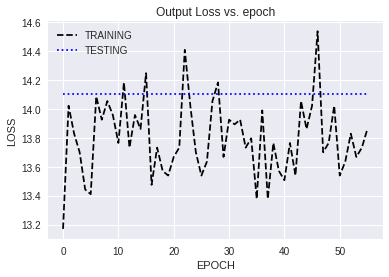

In [0]:
plt.plot(op_loss,'--k')
plt.plot(val_op_loss,':b')
plt.title('Output Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')


plt.show()

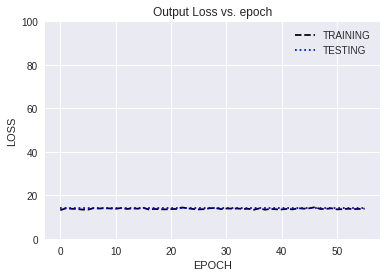

In [0]:
plt.plot(op_loss,'--k')
plt.plot(val_op_loss,':b')
plt.title('Output Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()

axes.set_ylim([0,100])

plt.show()

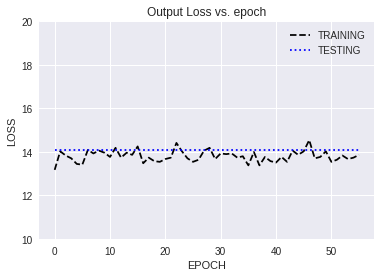

In [0]:
plt.plot(op_loss,'--k')
plt.plot(val_op_loss,':b')
plt.title('Output Loss vs. epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()

axes.set_ylim([10,20])

plt.show()

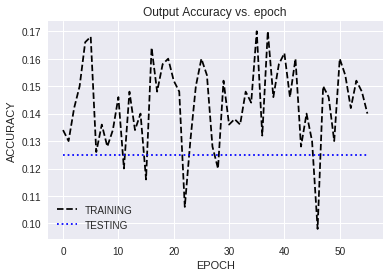

In [0]:
plt.plot(op_acc,'--k')
plt.plot(val_op_acc,':b')
plt.title('Output Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')


plt.show()

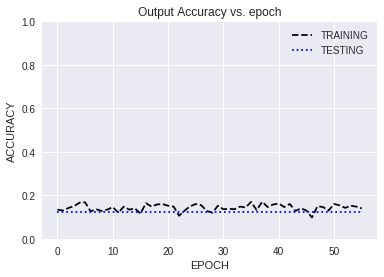

In [0]:
plt.plot(op_acc,'--k')
plt.plot(val_op_acc,':b')
plt.title('Output Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()

axes.set_ylim([0,1])

plt.show()

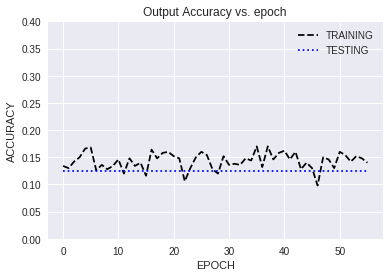

In [0]:
plt.plot(op_acc,'--k')
plt.plot(val_op_acc,':b')
plt.title('Output Accuracy vs. epoch')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['TRAINING', 'TESTING'], loc='best')
axes = plt.gca()

axes.set_ylim([0,0.4])

plt.show()

In [0]:
from keras.models import load_model
model.save('googlenet.h5')
model = load_model('googlenet.h5')
from google.colab import files
files.download('googlenet.h5') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 35196, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
import pickle

f = open('his_google.pckl', 'wb')
pickle.dump(loss_, f)
f.close()

f = open('his_google.pckl', 'rb')
loss_ = pickle.load(f)
f.close()

files.download('his_google.pckl') 

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 59788, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

KeyboardInterrupt: ignored

In [0]:
y_hat = np.argmax(model.predict(x_test)[0],axis=1)


In [0]:
np.shape(y_train)

(5600, 7)

In [0]:
np.shape(model.predict(x_test))

(3, 700, 7)

In [0]:
np.shape(x_test)

(700, 224, 224, 1)

In [0]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
print("Classification Report")
print(classification_report(y_test, y_hat, digits=5))

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       100
           1    0.00000   0.00000   0.00000       100
           2    0.14286   1.00000   0.25000       100
           3    0.00000   0.00000   0.00000       100
           4    0.00000   0.00000   0.00000       100
           5    0.00000   0.00000   0.00000       100
           6    0.00000   0.00000   0.00000       100

   micro avg    0.14286   0.14286   0.14286       700
   macro avg    0.02041   0.14286   0.03571       700
weighted avg    0.02041   0.14286   0.03571       700



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
print("ACCURACY:",(accuracy_score(y_test, y_hat)))

ACCURACY: 0.14285714285714285
